<a href="https://colab.research.google.com/github/fantaxiah/MachineLearningFall23/blob/main/MATH8334CaseStudy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 57.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 75.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=e0a8ec3910640b11fb691d908050234bec1bbd416ecd0f1d820aced2cf973d95
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    U

1. Load the dataset into your R/Python

In [ ]:
data = pd.read_csv('/content/QualityOfLifeData.csv')
data

,ID,INTERVIEWDATE,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,...,MSA_Q_16,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CHRONICDISEASESCORE
0,171,0,1,49,3,2,4,4,4,4,...,2,2,3,4,2,1,4,5,2,1.60
1,171,427,1,49,3,2,4,3,4,4,...,3,1,2,4,2,1,4,5,2,1.60
2,172,0,1,62,3,2,3,3,4,2,...,5,1,1,1,2,1,4,5,3,1.54
3,179,0,1,44,7,2,6,6,6,6,...,6,6,5,5,4,4,4,5,1,2.97
4,180,0,1,64,3,1,3,2,3,3,...,1,1,1,1,1,4,4,5,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2834,0,2,60,4,1,4,4,4,3,...,2,1,2,2,1,4,4,5,1,2.54
2352,2835,0,1,81,4,1,3,4,3,5,...,2,1,3,2,1,4,4,5,0,0.34
2353,2836,0,1,40,3,1,4,3,4,4,...,1,1,4,1,1,4,4,5,1,0.63
2354,2837,0,1,54,4,1,4,2,3,3,...,1,1,1,1,1,4,4,5,0,0.86


2. We will create a new dichotomous response variable based on the variable ”CHRONICDISEASESCORE”. However, it has some missing data (denoted by ”-9”). First
remove these missing information.

In [ ]:
column_values = data['CHRONICDISEASESCORE']
print(column_values)

0       1.60
1       1.60
2       1.54
3       2.97
4       1.28
        ... 
2351    2.54
2352    0.34
2353    0.63
2354    0.86
2355    1.28
Name: CHRONICDISEASESCORE, Length: 2356, dtype: float64


In [ ]:
unique_values = data['CHRONICDISEASESCORE'].unique()
print(unique_values)

[ 1.6   1.54  2.97  1.28  1.31  1.67  2.21  2.51  2.44  0.48  1.06 -9.
  1.25  2.04  2.08  0.66  0.88  1.57  3.18  0.74  2.34  0.34  1.97  0.67
  0.81  1.01  2.87  2.57  1.2   1.27  0.95  0.52  1.42  1.02  2.33  3.14
  1.73  4.76  2.58  2.46  1.12  1.48  0.77  2.45  0.54  0.82  1.26  4.15
  3.17  2.23  3.26  2.89  1.99  1.65  0.91  2.17  2.64  0.72  2.94  1.74
  1.83  1.33  2.07  2.11  1.63  1.87  1.13  2.05  2.54  0.94  1.89  1.98
  3.15  3.65  0.4   1.45  1.78  2.81  2.41  0.6   2.42  1.88  2.67  2.1
  1.66  1.79  1.71  1.84  1.15  1.3   2.79  1.14  0.84  3.07  1.23  2.24
  1.22  2.72  2.3   0.61  2.48  1.4   1.35  0.    2.69  1.36  2.13  2.15
  2.93  3.29  1.46  2.09  1.68  2.25  1.95  2.2   2.49  1.81  4.26  1.49
  1.03  2.66  2.19  1.55  2.37  3.24  2.43  1.9   2.5   1.96  1.61  1.75
  3.08  0.97  2.36  1.76  1.32  2.99  3.    3.03  1.5   2.4   0.68  1.52
  1.85  0.29  0.23  2.56  2.88  2.65  3.11  3.41  2.29  1.34  0.92  1.8
  3.6   1.77  1.86  0.63  0.32  2.8   0.8   2.01  2.52 

In [ ]:
mask = (data['CHRONICDISEASESCORE'] != -9)
filt_data = data[mask]

In [ ]:
# Checking the -9 is gone
unique_values = filt_data['CHRONICDISEASESCORE'].unique()
print(unique_values)

[1.6  1.54 2.97 1.28 1.31 1.67 2.21 2.51 2.44 0.48 1.06 1.25 2.04 2.08
 0.66 0.88 1.57 3.18 0.74 2.34 0.34 1.97 0.67 0.81 1.01 2.87 2.57 1.2
 1.27 0.95 0.52 1.42 1.02 2.33 3.14 1.73 4.76 2.58 2.46 1.12 1.48 0.77
 2.45 0.54 0.82 1.26 4.15 3.17 2.23 3.26 2.89 1.99 1.65 0.91 2.17 2.64
 0.72 2.94 1.74 1.83 1.33 2.07 2.11 1.63 1.87 1.13 2.05 2.54 0.94 1.89
 1.98 3.15 3.65 0.4  1.45 1.78 2.81 2.41 0.6  2.42 1.88 2.67 2.1  1.66
 1.79 1.71 1.84 1.15 1.3  2.79 1.14 0.84 3.07 1.23 2.24 1.22 2.72 2.3
 0.61 2.48 1.4  1.35 0.   2.69 1.36 2.13 2.15 2.93 3.29 1.46 2.09 1.68
 2.25 1.95 2.2  2.49 1.81 4.26 1.49 1.03 2.66 2.19 1.55 2.37 3.24 2.43
 1.9  2.5  1.96 1.61 1.75 3.08 0.97 2.36 1.76 1.32 2.99 3.   3.03 1.5
 2.4  0.68 1.52 1.85 0.29 0.23 2.56 2.88 2.65 3.11 3.41 2.29 1.34 0.92
 1.8  3.6  1.77 1.86 0.63 0.32 2.8  0.8  2.01 2.52 3.02 3.32 1.24 1.21
 1.11 0.79 2.92 2.28 3.1  1.93 2.55 3.25 3.51 2.78 1.94 2.26 1.07 1.38
 2.59 2.35 0.73 0.86 3.06 2.53 2.77 1.19 1.62 2.63 0.96 3.22 1.18 1.51
 2.76 3.1

3. And, then create a new variable called ”CAT CHRONICDISEASESCORE” (this will
be our response variable) by dividing the it to two groups called ”minor disease”
(denoted by 0) and ”severe disease (denoted by 1) based on the mean value. That is, if
a certain patient CHRONICDISEASESCORE is less than its mean, then he has minor
disease.

In [ ]:
mean_value = filt_data['CHRONICDISEASESCORE'].mean()
print("Mean:", mean_value)

Mean: 1.4974706413730805


In [ ]:
filt_data['CAT_CHRONICDISEASESCORE'] = filt_data['CHRONICDISEASESCORE'].apply(lambda x: 0 if x < mean_value else 1)
filt_data

<ipython-input-18-972d8e72a2dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data['CAT_CHRONICDISEASESCORE'] = filt_data['CHRONICDISEASESCORE'].apply(lambda x: 0 if x < mean_value else 1)


,ID,INTERVIEWDATE,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,...,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CHRONICDISEASESCORE,CAT_CHRONICDISEASESCORE
0,171,0,1,49,3,2,4,4,4,4,...,2,3,4,2,1,4,5,2,1.60,1
1,171,427,1,49,3,2,4,3,4,4,...,1,2,4,2,1,4,5,2,1.60,1
2,172,0,1,62,3,2,3,3,4,2,...,1,1,1,2,1,4,5,3,1.54,1
3,179,0,1,44,7,2,6,6,6,6,...,6,5,5,4,4,4,5,1,2.97,1
4,180,0,1,64,3,1,3,2,3,3,...,1,1,1,1,4,4,5,0,1.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2834,0,2,60,4,1,4,4,4,3,...,1,2,2,1,4,4,5,1,2.54,1
2352,2835,0,1,81,4,1,3,4,3,5,...,1,3,2,1,4,4,5,0,0.34,0
2353,2836,0,1,40,3,1,4,3,4,4,...,1,4,1,1,4,4,5,1,0.63,0
2354,2837,0,1,54,4,1,4,2,3,3,...,1,1,1,1,4,4,5,0,0.86,0


In [ ]:
#Now that CHRONICDISEASESCORE has been converted to a binary variable, it can be removed
filt_data=filt_data.drop(columns=['CHRONICDISEASESCORE']) #remove ID column

4. Check for any other missing data. If data is missing for more than 60% of the observations, it may be wise to discard that variable. If needed, consider any data imputation
method available in the ”Hmisc” or ”mi” packages in R or ”sklearn.impute” in Python.

In [ ]:
missing_data = filt_data.isna().sum()
print(missing_data)

ID                         0
INTERVIEWDATE              0
LANGUAGE                   0
AGE                        0
RACE_ETHNICITY             0
SEX                        0
QOL_Q_01                   0
QOL_Q_02                   0
QOL_Q_03                   0
QOL_Q_04                   0
QOL_Q_05                   0
QOL_Q_06                   0
QOL_Q_07                   0
QOL_Q_08                   0
QOL_Q_09                   0
QOL_Q_10                   0
MSA_Q_01                   0
MSA_Q_02                   0
MSA_Q_03                   0
MSA_Q_04                   0
MSA_Q_05                   0
MSA_Q_06                   0
MSA_Q_07                   0
MSA_Q_08                   0
MSA_Q_09                   0
MSA_Q_10                   0
MSA_Q_11                   0
MSA_Q_12                   0
MSA_Q_13                   0
MSA_Q_14                   0
MSA_Q_15                   0
MSA_Q_16                   0
MSA_Q_17                   0
PH2_Q_01                   0
PH2_Q_02      

In [ ]:
# There is no missing data, but the ID column is useless for regression so I'm going to remove it
del filt_data['ID']
filt_data

,INTERVIEWDATE,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,QOL_Q_05,...,MSA_Q_16,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CAT_CHRONICDISEASESCORE
0,0,1,49,3,2,4,4,4,4,1,...,2,2,3,4,2,1,4,5,2,1
1,427,1,49,3,2,4,3,4,4,5,...,3,1,2,4,2,1,4,5,2,1
2,0,1,62,3,2,3,3,4,2,4,...,5,1,1,1,2,1,4,5,3,1
3,0,1,44,7,2,6,6,6,6,6,...,6,6,5,5,4,4,4,5,1,1
4,0,1,64,3,1,3,2,3,3,2,...,1,1,1,1,1,4,4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,0,2,60,4,1,4,4,4,3,3,...,2,1,2,2,1,4,4,5,1,1
2352,0,1,81,4,1,3,4,3,5,4,...,2,1,3,2,1,4,4,5,0,0
2353,0,1,40,3,1,4,3,4,4,3,...,1,1,4,1,1,4,4,5,1,0
2354,0,1,54,4,1,4,2,3,3,3,...,1,1,1,1,1,4,4,5,0,0


In [ ]:
# The INTERVIEWDATE column is almost entirely zeros, so I'm going to remove it too
del filt_data['INTERVIEWDATE']

5. Perform descriptive analysis as necessary (include correlation analysis and any other
graphs/tests that is needed check the relationship between the response and the predictor variables). Comment on your findings.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
filt_data.describe()

,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,QOL_Q_05,QOL_Q_06,...,MSA_Q_16,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CAT_CHRONICDISEASESCORE
count,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,...,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000
mean,1.208220,58.635050,3.619241,1.421861,3.665763,3.415086,3.710479,3.020325,3.113821,2.960253,...,1.809846,2.065492,2.473803,2.361337,2.226287,3.288166,3.776423,4.670732,0.906956,0.476965
std,0.406127,12.327566,1.247505,0.493968,1.035010,1.136332,1.024203,1.304184,1.283444,1.345861,...,1.483597,1.531047,1.759871,1.733346,1.310328,1.364476,0.993956,1.272065,1.628490,0.499582
min,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,0.000000
25%,1.000000,52.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,0.000000,0.000000
50%,1.000000,59.000000,3.000000,1.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,4.000000,5.000000,1.000000,0.000000
75%,1.000000,66.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,2.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,1.000000,1.000000
max,2.000000,90.000000,7.000000,2.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,6.000000,10.000000,1.000000


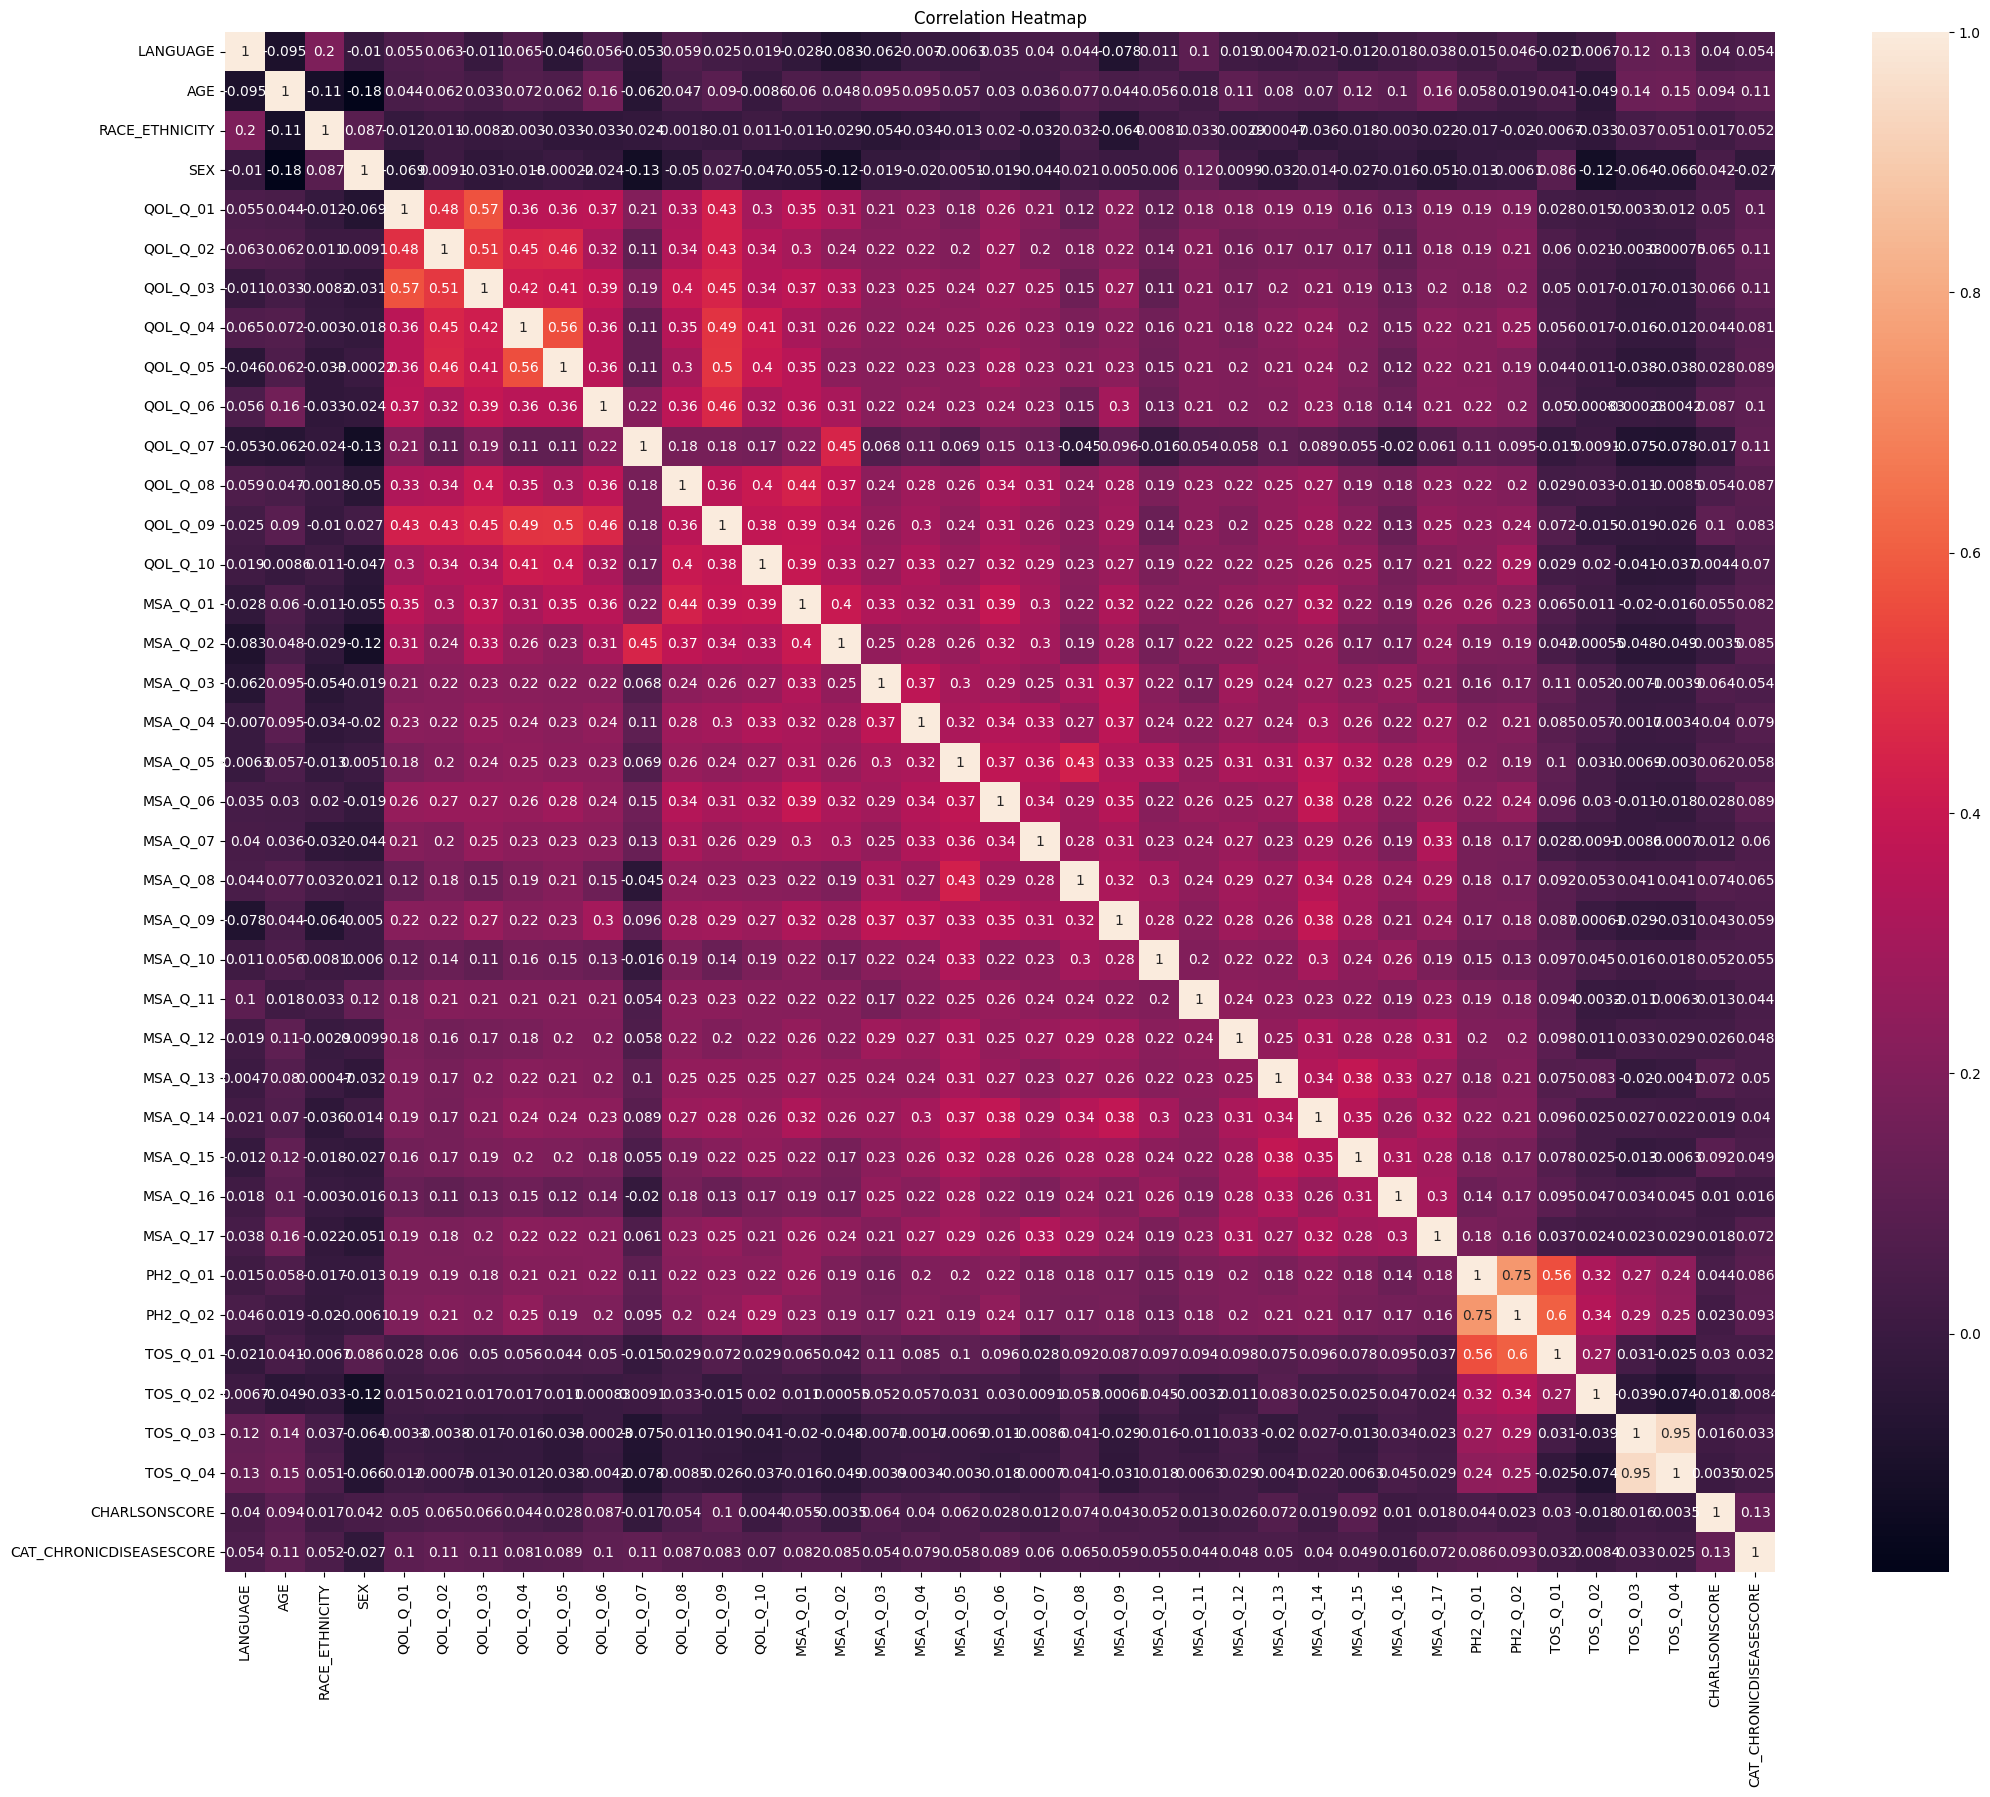

In [ ]:
correlation_matrix = filt_data.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

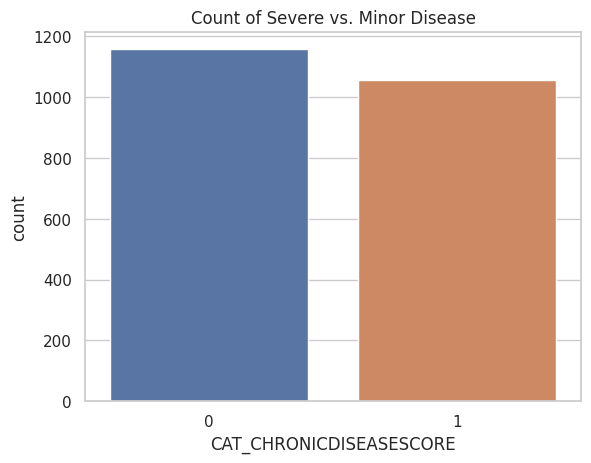

0    1158
1    1056
Name: CAT_CHRONICDISEASESCORE, dtype: int64


In [ ]:
sns.countplot(data=filt_data, x='CAT_CHRONICDISEASESCORE')
plt.title('Count of Severe vs. Minor Disease')
plt.show()

class_counts = filt_data['CAT_CHRONICDISEASESCORE'].value_counts()
print(class_counts)

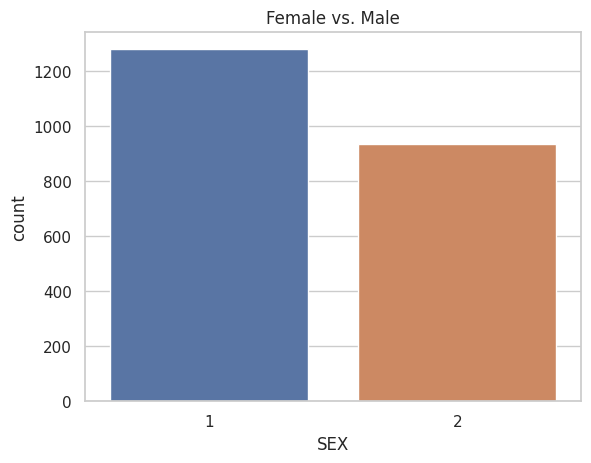

1    1280
2     934
Name: SEX, dtype: int64


In [ ]:
sns.countplot(filt_data, x='SEX')
plt.title('Female vs. Male')
plt.show()
# Assuming 'categorical_column' is the column you want to count
sex = filt_data['SEX'].value_counts()
print(sex)

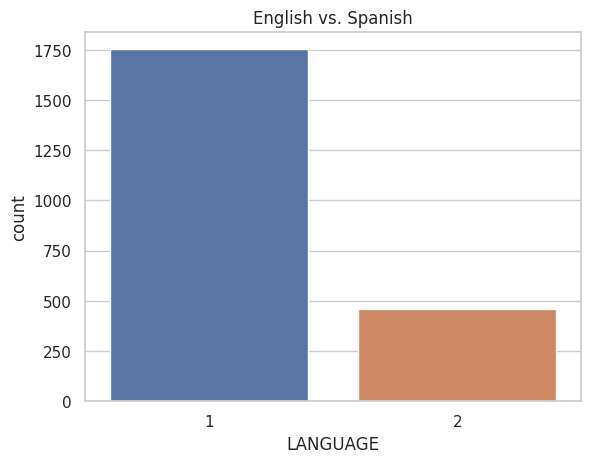

1    1753
2     461
Name: LANGUAGE, dtype: int64


In [ ]:
sns.countplot(filt_data, x='LANGUAGE')
plt.title('English vs. Spanish')
plt.show()

lang = filt_data['LANGUAGE'].value_counts()
print(lang)

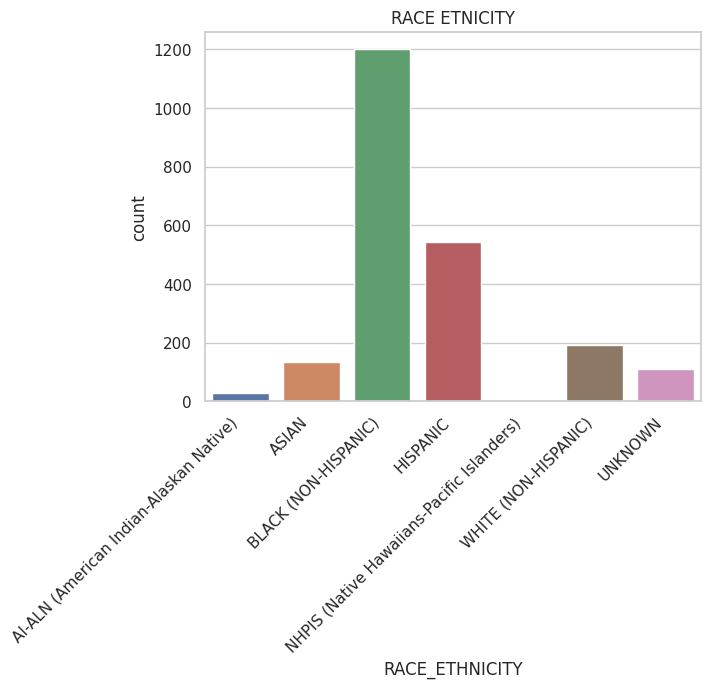

3    1288
4     570
6     204
2     142
7     115
1      31
5       6
Name: RACE_ETHNICITY, dtype: int64


In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(data=filt_data, x='RACE_ETHNICITY')

custom_labels = [
    'AI-ALN (American Indian-Alaskan Native)',
    'ASIAN',
    'BLACK (NON-HISPANIC)',
    'HISPANIC',
    'NHPIS (Native Hawaiians-Pacific Islanders)',
    'WHITE (NON-HISPANIC)',
    'UNKNOWN'
]

ax.set_xticklabels(custom_labels, rotation=45, ha="right")

plt.title('RACE ETNICITY')
plt.show()

race = data['RACE_ETHNICITY'].value_counts()
print(race)

6. Do the Train (80%):Test(20%) data split based on the stratified sampling. [Hint: use
createDataPartition() in R or train test split() from Python ”sklearn.model selection”
module]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
X = filt_data.drop('CAT_CHRONICDISEASESCORE', axis=1) # Features
y = filt_data['CAT_CHRONICDISEASESCORE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7. Create a logistic regression model and check for the significant predictor variables
associated with the response using the train set.

In [ ]:
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [ ]:
#Logistic Regression Model
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
LANGUAGE,0.0616,0.111,0.554,0.580
AGE,0.0056,0.003,1.688,0.091
RACE_ETHNICITY,0.0428,0.035,1.216,0.224
SEX,-0.2667,0.085,-3.130,0.002
QOL_Q_01,-0.0216,0.055,-0.390,0.696
QOL_Q_02,0.0749,0.050,1.495,0.135
QOL_Q_03,0.0190,0.058,0.328,0.743
QOL_Q_04,-0.0129,0.045,-0.287,0.774
QOL_Q_05,0.0339,0.046,0.742,0.458
QOL_Q_06,0.0395,0.040,0.987,0.324


In [ ]:
# Add a constant term to the features (intercept)
X_train = sm.add_constant(X_train)

# Create a logistic regression model using GLM
logistic= sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = logistic.fit()

# Print the summary of the model to check for significant predictor variables
print(results.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     CAT_CHRONICDISEASESCORE   No. Observations:                 1771
Model:                                 GLM   Df Residuals:                     1732
Model Family:                     Binomial   Df Model:                           38
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -1170.5
Date:                     Mon, 23 Oct 2023   Deviance:                       2340.9
Time:                             02:39:41   Pearson chi2:                 1.79e+03
No. Iterations:                          4   Pseudo R-squ. (CS):            0.05939
Covariance Type:                 nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
results.pvalues

const             3.213001e-08
LANGUAGE          3.163448e-02
AGE               2.344395e-05
RACE_ETHNICITY    2.010472e-03
SEX               9.300804e-01
QOL_Q_01          5.549367e-01
QOL_Q_02          2.863039e-01
QOL_Q_03          2.811587e-01
QOL_Q_04          5.822495e-01
QOL_Q_05          5.327600e-01
QOL_Q_06          3.608900e-01
QOL_Q_07          1.419739e-04
QOL_Q_08          7.804582e-01
QOL_Q_09          1.718157e-01
QOL_Q_10          9.815827e-01
MSA_Q_01          8.218495e-01
MSA_Q_02          3.873368e-01
MSA_Q_03          9.466054e-01
MSA_Q_04          7.123513e-01
MSA_Q_05          6.264227e-01
MSA_Q_06          5.589583e-01
MSA_Q_07          9.654225e-01
MSA_Q_08          1.346594e-01
MSA_Q_09          3.572436e-01
MSA_Q_10          5.245314e-01
MSA_Q_11          7.171372e-01
MSA_Q_12          3.016714e-01
MSA_Q_13          6.397838e-01
MSA_Q_14          6.291763e-01
MSA_Q_15          4.123262e-01
MSA_Q_16          5.528740e-01
MSA_Q_17          1.570606e-01
PH2_Q_01

8. Do the predictions on the test set and evaluate the model performance of the model
using sensitivity, specificity, accuracy and AUC values.

In [ ]:
probs = results.predict()
probs[:10]

array([0.58027971, 0.51420801, 0.48533808, 0.41083323, 0.47143426,
       0.24890009, 0.40192803, 0.59927061, 0.6420724 , 0.41296254])

9. Create a linear and quadratic discriminant analyses models using the train set. Make
sure to normalize your predictor variables before training.

10. Do the predictions on the test set (make sure to normalize the data here as well) and
evaluate the model performance of the linear and discriminant analyses models using
sensitivity, specificity, accuracy and AUC values.

11. Compare your sensitivity, specificity, accuracy and AUC values across the three models
(Logistic, Linear discriminant and Quadratic discriminant models). Comment on your
findings.